## 1. Setup

In [1]:
import sys
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import skimage.io
import warnings

from utils.preprocessing.misc import gaussian_smoothing, count_map_from_dots_img
from utils.preprocessing.misc import full_knn_map_from_dots_img, iknn_map_from_dots_img

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

## 2. Load an image with its ground truth dot annotations

In [4]:
DATASET_PATH = '../datasets/vgg_cells/train'
idx = '011'
IMG_NAME  = f'/images/{idx}cell.png'
DOTS_NAME = f'/gt_dots/{idx}dots.png'

In [5]:
img = skimage.io.imread(f'{DATASET_PATH}/{IMG_NAME}')
dots_img = skimage.io.imread(f'{DATASET_PATH}/{DOTS_NAME}')
dots_img = dots_img.sum(axis=2) / 255.
dots_img = dots_img.astype(np.float32)

In [6]:
def desc(img, title='img: '):
    print(title, img.shape, img.min(), img.max(), img.dtype)

desc(img)
desc(dots_img, title='dots:')

img:  (256, 256, 3) 0 252 uint8
dots: (256, 256) 0.0 1.0 float32


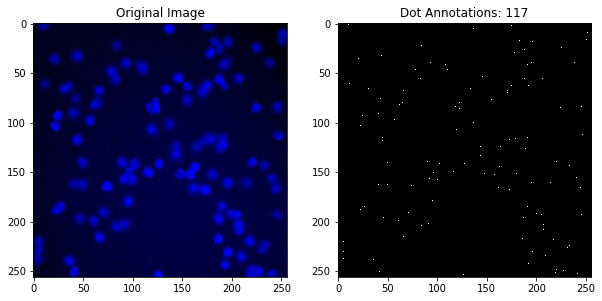

In [7]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title(f'Dot Annotations: {dots_img.sum():.0f}')
plt.imshow(dots_img, cmap='gray')
plt.show()

## 3. Create full kNN and inverse kNN maps

In [8]:
full_knn_map = full_knn_map_from_dots_img(dots_img)
iknn_map = iknn_map_from_dots_img(dots_img)

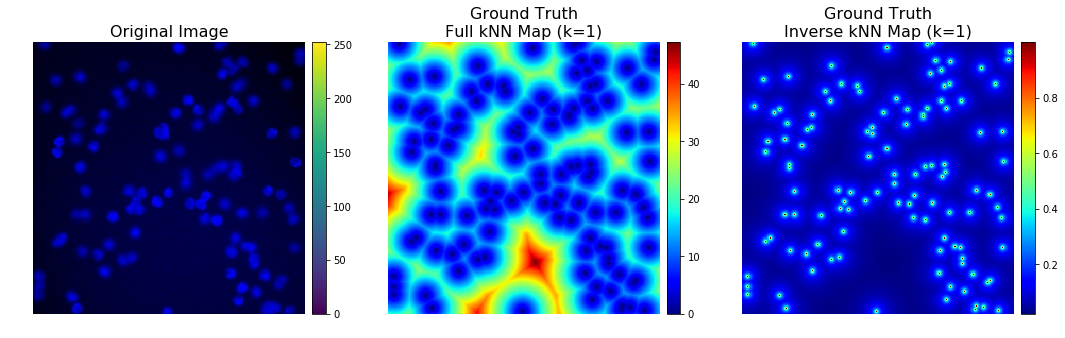

In [9]:
fontsize = 16
fraction = 0.046 
pad = 0.025

fraction=fraction
pad=pad
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image', fontsize=fontsize)
plt.imshow(img)
plt.colorbar(fraction=fraction, pad=pad)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Ground Truth\nFull kNN Map (k=1)', fontsize=fontsize)
plt.imshow(full_knn_map, cmap='jet')
plt.colorbar(fraction=fraction, pad=pad)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Ground Truth\nInverse kNN Map (k=1)', fontsize=fontsize)
plt.imshow(iknn_map, cmap='jet')
plt.colorbar(fraction=fraction, pad=pad)
plt.axis('off')

plt.show()